In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x0 = 0
y0 = 1
xf = 10
n = 101
deltax = (xf - x0) / (n - 1)

x = np.linspace (x0 , xf , n)

y = np.zeros ( [n] )

y [0] = y0
for i in range ( 1 , n ) :
    y[i] = deltax * (-y [i -1] + np.sin (x [i -1])) + y [i -1]
    
for i in range ( n ) :
    print (x[i] , y[i])

plt.plot (x , y , ' o ')
plt.xlabel (" Value of x ")
plt.ylabel (" Value of y ")
plt.title ("Approximate Solution with Forward Euler's Method ")
plt.show ( )


In [1]:
class bcolors:
    HEADER    = '\033[95m'
    OKBLUE    = '\033[94m'
    OKGREEN   = '\033[92m'
    WARNING   = '\033[93m'
    FAIL      = '\033[91m'
    ENDC      = '\033[0m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    
print (bcolors.WARNING + "Warning: No active frommets remain. Continue?" 
      + bcolors.ENDC)

In [128]:
################################################################################
# Step 1: 
# Obtain the starting values 
################################################################################

# start time (initial time) [s] - this value is modified at each iteration of the algorithm
t = 0
# time increment [s]
dt = 0.1
# number of time steps
n_time_step = 100
# print info
# print("final time: %.1f [s] (%0.1f [min])" % (t_fin, t_fin/60))
def info_time():
    print(bcolors.BOLD + 
          "*** INFO TIME ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "current simulation time (t): %.1f [s] - %.1f [min],\
time increment (dt): %.1f [s]" % 
          (t, t/60, dt) + 
         bcolors.ENDC)
info_time()

# mass of the tundish (max_value) [kg]
M_td_max = 30 * 1000
# mass of the tundish (min_value during change of ladle) [kg]
M_td_min = 12 * 1000
# mass of the tundish (initial value) [kg]
M_td = 30 * 1000
# print info
def info_tundish():
    print(bcolors.BOLD + 
          "*** INFO TUNDISH ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "M_td: %.1f [kg], M_td_max: %.1f [kg], M_td_min: %.1f [kg]" % 
          (M_td, M_td_max, M_td_min) + 
          bcolors.ENDC)
info_tundish()    

# casting speed [m/min]
c_speed = 0.45
# casting speed [m/s]
cast_speed = c_speed / 60
# section diameter [m]
diam = 405 / 1000 
# number of strands
n_strands = 4
# print info
def info_caster():
    print(bcolors.BOLD + 
          "*** INFO CASTER ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "cast speed: %.2f [m/min], cast_speed: %.5f [m/s], section diameter: %.3f [m]\
number of strands: %d" % 
          (c_speed, cast_speed, diam, n_strands) + 
          bcolors.ENDC)
info_caster()

# in-flow mass flow rate [m3/s]
Q_in = 0
# out-flow mass flow rate for a single strand [m3/s/strand]
import math
Q_out_j = math.pi * (diam / 2)**2 * cast_speed
# out-flow mass [m3/s]
Q_out = Q_out_j * n_strands
print("Q_out: %.5f [m3/s]" % Q_out)
# print info
def info_flow_rate():
     print(bcolors.BOLD +  
          "*** INFO FLOW RATE ***\n" +  bcolors.ENDC + bcolors.UNDERLINE +
          "Q_in: %.6f [m3/s], Q_out_j: %.6f [m3/s/strand], Q_out: %.6f [m3/s]" % 
          (Q_in, Q_out_j, Q_out) + 
          bcolors.ENDC)
info_flow_rate()
        
# density of steel entering from the inlet [kg/m3]
rho_in = 7750 
# density of steel coming out of the exit [kg/m3]
rho_out = 7650 
def info_density():
     print(bcolors.UNDERLINE + 
          "*** INFO DENSITY ***\n" +
          "rho_in: %.1f, rho_out: %.1f" % 
          (rho_in, rho_out) + 
          bcolors.ENDC)
info_density()

# inlet concentration 
C_in = 1
# outlet concentration
C_out = 0
# average concentration (initial value)
C_ave = 0
def info_concentration():
     print(bcolors.BOLD + 
          "*** INFO CONCENTRATION ***\n" +  bcolors.ENDC + bcolors.UNDERLINE +
          "C_in: %.1f, C_out: %.1f, C_ave: %.1f" % 
          (C_in, C_out, C_ave) + 
          bcolors.ENDC)
info_concentration()

# optimized scale factor
f_opt = 1

def M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out):
    """ Function used to update the mass o the tundish
    
        INPUTS:
            dt:       time increment                       [s]
            M_td:     mass o the tundish                   [kg]
            rho_in:   density of the in-flow stream        [kg/m3]
            rho_out:  density of the out-flow stream       [kg/m3]
            Q_in:     mass flow rate o the in-flow stream  [m3/s]
            Q_out:    mass flow rate o the out-flow stream [m3/s]
        OUTPUTS:
            M_td:     updated value for the tundish mass   [kg]
    """
    # print("rho_in",rho_in,"Q_in",Q_in,"dt",dt,"Q_out",Q_out,"rho_out",rho_out)
    print(bcolors.HEADER + ">> initial mass: %.1f [kg]" % M_td)
    M_td = M_td + (rho_in * Q_in * dt) - (Q_out * rho_out * dt)
    print("<< final mass: %.1f [kg]" % M_td + bcolors.ENDC)
    return M_td

def rho_out_fun(C_out, rho_in, rho_out):
    """Function used to update the density of the out-flow
    
        INPUTS:
            C_out:    concentation at the outlet        
            rho_in:   density o the steel at the inlet           [kg/m3]
            rho_out:  density o the steel at the outlet          [kg/m3]
        OUTPUTS:
            rho_out:  updated density of the steel at the outlet [kg/m3]
    """
    print(bcolors.OKBLUE + ">> initial rho_out: %.1f [kg/m3]" % rho_out)
    rho_out = C_out * rho_in + (1 - C_out) * rho_out
    print("<< final rho_out: %.1f [kg/m3]" % rho_out + bcolors.ENDC)
    return rho_out

def C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out):
    """Function used to update the value of C_ave
    
        INPUTS:
            dt:
            M_td:     mass o the tundish                   [kg]
            Q_in:     mass flow rate o the in-flow stream  [m3/s]
            Q_out:    mass flow rate o the out-flow stream [m3/s]
            C_in:
            C_out:
            C_ave:
            rho_in:   density of the in-flow stream        [kg/m3]
            rho_out:  density of the out-flow stream       [kg/m3]
        OUTPUTS:
            C_ave: 
    """
    print(bcolors.OKGREEN + ">>>   initial C_ave: %.1f " % C_ave)
    C_ave = (M_td * C_ave + Q_in * rho_in * dt * C_in) / M_td - \
            (Q_out * rho_out * dt * C_out) / M_td
    print("<<<   final C_ave: %.1f " % C_ave + bcolors.ENDC)
    return C_ave

def C_out_fun(f_opt, C_ave, C_in, C_out):
    """Function used to update the concentration leaving the tundish
        
        INPUTS:
            f_opt: 
            C_ave:
            C_in:
            C_out:
        OUTPUTS:
            C_out:
    """
    print(bcolors.WARNING + ">>>>    initial C_out: %.1f" % C_out)
    C_out = f_opt * C_ave + (1 - f_opt) * C_in
    print("<<<<    final C_out: %.1f" % C_out + bcolors.ENDC)
    return C_out

################################################################################
# "Main program loop" 
################################################################################
#for x in range (n_time_step):
while (M_td > M_td_min ):
    ############################################################################
    # Step 2:
    # update the tundish weigth
    # update the out-flow density
    ############################################################################
    M_td = M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out)
    rho_out = rho_out_fun(C_out, rho_in, rho_out)
    ############################################################################
    # Step 3:
    # calculate C_ave(t+dt) 
    ############################################################################
    C_ave = C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out)
    ############################################################################
    # Step 4:
    # calculate C_out(t+dt)
    ############################################################################
    C_out = C_out_fun(f_opt, C_ave, C_in, C_out)
    ############################################################################
    # Step 5:
    # update the simulation time step (t)
    ############################################################################
    t = t + dt
    print(bcolors.FAIL + "+++++     simulation time: %.1f [s]" % t + bcolors.ENDC)
    
info_time()

*** INFO TIME ***
current simulation time (t): 0.0 [s] - 0.0 [min],time increment (dt): 0.1 [s]
*** INFO TUNDISH ***
M_td: 30000.0 [kg], M_td_max: 30000.0 [kg], M_td_min: 12000.0 [kg]
*** INFO CASTER ***
cast speed: 0.45 [m/min], cast_speed: 0.00750 [m/s], section diameter: 0.405 [m]number of strands: 4
Q_out: 0.00386 [m3/s]
*** INFO FLOW RATE ***
Q_in: 0.000000 [m3/s], Q_out_j: 0.000966 [m3/s/strand], Q_out: 0.003865 [m3/s]
*** INFO DENSITY ***
rho_in: 7750.0, rho_out: 7650.0
*** INFO CONCENTRATION ***
C_in: 1.0, C_out: 0.0, C_ave: 0.0
>> initial mass: 30000.0 [kg]
<< final mass: 29997.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 0.1 [s]
>> initial mass: 29997.0 [kg]
<< final mass: 29994.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_

>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 9.1 [s]
>> initial mass: 29731.0 [kg]
<< final mass: 29728.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 9.2 [s]
>> initial mass: 29728.0 [kg]
<< final mass: 29725.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 9.3 [s]
>> initial mass: 29725.0 [kg]
<< final mass: 29722.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 9.4 [s]
>> initial mass: 29722.1 [kg]
<< final mass: 29719.1 [kg]
>> initial rho_o

+++++     simulation time: 26.2 [s]
>> initial mass: 29225.4 [kg]
<< final mass: 29222.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 26.3 [s]
>> initial mass: 29222.4 [kg]
<< final mass: 29219.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 26.4 [s]
>> initial mass: 29219.5 [kg]
<< final mass: 29216.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 26.5 [s]
>> initial mass: 29216.5 [kg]
<< final mass: 29213.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0

<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 47.3 [s]
>> initial mass: 28601.6 [kg]
<< final mass: 28598.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 47.4 [s]
>> initial mass: 28598.6 [kg]
<< final mass: 28595.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 47.5 [s]
>> initial mass: 28595.6 [kg]
<< final mass: 28592.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 47.6 [s]
>> initial mass: 28592.7 [kg]
<< final mass: 28589.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< 

<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 67.4 [s]
>> initial mass: 28007.3 [kg]
<< final mass: 28004.3 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 67.5 [s]
>> initial mass: 28004.3 [kg]
<< final mass: 28001.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 67.6 [s]
>> initial mass: 28001.4 [kg]
<< final mass: 27998.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 67.7 [s]
>> initial mass: 27998.4 [kg]
<< fina

<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 86.6 [s]
>> initial mass: 27439.6 [kg]
<< final mass: 27436.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 86.7 [s]
>> initial mass: 27436.7 [kg]
<< final mass: 27433.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 86.8 [s]
>> initial mass: 27433.7 [kg]
<< final mass: 27430.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 86.9 [s]
>> initial mass: 27430.8 [kg]
<< fina

<< final mass: 26972.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 102.4 [s]
>> initial mass: 26972.5 [kg]
<< final mass: 26969.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 102.5 [s]
>> initial mass: 26969.6 [kg]
<< final mass: 26966.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 102.6 [s]
>> initial mass: 26966.6 [kg]
<< final mass: 26963.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++  

<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 119.5 [s]
>> initial mass: 26466.9 [kg]
<< final mass: 26464.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 119.6 [s]
>> initial mass: 26464.0 [kg]
<< final mass: 26461.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 119.7 [s]
>> initial mass: 26461.0 [kg]
<< final mass: 26458.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 119.8 [s]
>> initial mass: 26458.1 [kg]
<< 

>> initial mass: 25890.4 [kg]
<< final mass: 25887.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 139.1 [s]
>> initial mass: 25887.5 [kg]
<< final mass: 25884.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 139.2 [s]
>> initial mass: 25884.5 [kg]
<< final mass: 25881.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 139.3 [s]
>> initial mass: 25881.6 [kg]
<< final mass: 25878.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<

>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 161.8 [s]
>> initial mass: 25216.3 [kg]
<< final mass: 25213.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 161.9 [s]
>> initial mass: 25213.4 [kg]
<< final mass: 25210.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 162.0 [s]
>> initial mass: 25210.4 [kg]
<< final mass: 25207.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 162.1 [s]
>> initial mass: 25207.5 [kg]
<< final mass: 25204.5 [kg]
>> initi

<<<<    final C_out: 0.0
+++++     simulation time: 181.7 [s]
>> initial mass: 24628.0 [kg]
<< final mass: 24625.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 181.8 [s]
>> initial mass: 24625.0 [kg]
<< final mass: 24622.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 181.9 [s]
>> initial mass: 24622.1 [kg]
<< final mass: 24619.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 182.0 [s]
>> initial mass: 24619.1 [kg]
<< final mass: 24616.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_a

<< final mass: 24063.3 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 200.8 [s]
>> initial mass: 24063.3 [kg]
<< final mass: 24060.3 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 200.9 [s]
>> initial mass: 24060.3 [kg]
<< final mass: 24057.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 201.0 [s]
>> initial mass: 24057.4 [kg]
<< final mass: 24054.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++  

>> initial mass: 23495.6 [kg]
<< final mass: 23492.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 220.1 [s]
>> initial mass: 23492.7 [kg]
<< final mass: 23489.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 220.2 [s]
>> initial mass: 23489.7 [kg]
<< final mass: 23486.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 220.3 [s]
>> initial mass: 23486.8 [kg]
<< final mass: 23483.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<

<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 233.9 [s]
>> initial mass: 23084.7 [kg]
<< final mass: 23081.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 234.0 [s]
>> initial mass: 23081.7 [kg]
<< final mass: 23078.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 234.1 [s]
>> initial mass: 23078.8 [kg]
<< final mass: 23075.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 234.2 [s]
>> initial mass: 23075.8 [kg]
<< 

<<<<    final C_out: 0.0
+++++     simulation time: 256.2 [s]
>> initial mass: 22425.4 [kg]
<< final mass: 22422.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 256.3 [s]
>> initial mass: 22422.4 [kg]
<< final mass: 22419.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 256.4 [s]
>> initial mass: 22419.5 [kg]
<< final mass: 22416.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 256.5 [s]
>> initial mass: 22416.5 [kg]
<< final mass: 22413.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_a

>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 276.2 [s]
>> initial mass: 21834.1 [kg]
<< final mass: 21831.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 276.3 [s]
>> initial mass: 21831.1 [kg]
<< final mass: 21828.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 276.4 [s]
>> initial mass: 21828.1 [kg]
<< final mass: 21825.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 276.5 [s]
>> initial mass: 21825.2 [kg]
<< final mass: 21822.2 [kg]
>> initi

>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 296.6 [s]
>> initial mass: 21230.9 [kg]
<< final mass: 21228.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 296.7 [s]
>> initial mass: 21228.0 [kg]
<< final mass: 21225.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 296.8 [s]
>> initial mass: 21225.0 [kg]
<< final mass: 21222.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 296.9 [s

>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 314.2 [s]
>> initial mass: 20710.6 [kg]
<< final mass: 20707.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 314.3 [s]
>> initial mass: 20707.6 [kg]
<< final mass: 20704.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 314.4 [s]
>> initial mass: 20704.7 [kg]
<< final mass: 20701.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 314.5 [s]
>> initial mass: 20701.7 [kg]
<< final mass: 20698.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.

+++++     simulation time: 331.6 [s]
>> initial mass: 20196.1 [kg]
<< final mass: 20193.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 331.7 [s]
>> initial mass: 20193.2 [kg]
<< final mass: 20190.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 331.8 [s]
>> initial mass: 20190.2 [kg]
<< final mass: 20187.3 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 331.9 [s]
>> initial mass: 20187.3 [kg]
<< final mass: 20184.3 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_av

>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 347.5 [s]
>> initial mass: 19726.1 [kg]
<< final mass: 19723.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 347.6 [s]
>> initial mass: 19723.1 [kg]
<< final mass: 19720.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 347.7 [s]
>> initial mass: 19720.1 [kg]
<< final mass: 19717.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 347.8 [s]
>> initial mass: 19717.2 [kg]
<< final mass: 19714.2 [kg]
>> initi

<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 361.4 [s]
>> initial mass: 19315.1 [kg]
<< final mass: 19312.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 361.5 [s]
>> initial mass: 19312.1 [kg]
<< final mass: 19309.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 361.6 [s]
>> initial mass: 19309.2 [kg]
<< final mass: 19306.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 361.7 [s]
>> initial mass: 19306.2 [kg]
<< final mass: 19303.3 [kg]
>> initial rho_out: 7650.0 [kg/m3]

>> initial mass: 18782.9 [kg]
<< final mass: 18780.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 379.5 [s]
>> initial mass: 18780.0 [kg]
<< final mass: 18777.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 379.6 [s]
>> initial mass: 18777.0 [kg]
<< final mass: 18774.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 379.7 [s]
>> initial mass: 18774.0 [kg]
<< final mass: 18771.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<

<<<<    final C_out: 0.0
+++++     simulation time: 397.7 [s]
>> initial mass: 18241.9 [kg]
<< final mass: 18238.9 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 397.8 [s]
>> initial mass: 18238.9 [kg]
<< final mass: 18236.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 397.9 [s]
>> initial mass: 18236.0 [kg]
<< final mass: 18233.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 398.0 [s]
>> initial mass: 18233.0 [kg]
<< final mass: 18230.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_a

<<<<    final C_out: 0.0
+++++     simulation time: 412.8 [s]
>> initial mass: 17795.4 [kg]
<< final mass: 17792.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 412.9 [s]
>> initial mass: 17792.5 [kg]
<< final mass: 17789.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 413.0 [s]
>> initial mass: 17789.5 [kg]
<< final mass: 17786.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 413.1 [s]
>> initial mass: 17786.6 [kg]
<< final mass: 17783.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_a

<< final mass: 17319.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 428.9 [s]
>> initial mass: 17319.4 [kg]
<< final mass: 17316.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 429.0 [s]
>> initial mass: 17316.5 [kg]
<< final mass: 17313.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 429.1 [s]
>> initial mass: 17313.5 [kg]
<< final mass: 17310.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++  

<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 445.7 [s]
>> initial mass: 16822.7 [kg]
<< final mass: 16819.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 445.8 [s]
>> initial mass: 16819.8 [kg]
<< final mass: 16816.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 445.9 [s]
>> initial mass: 16816.8 [kg]
<< final mass: 16813.9 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 446.0 [s]
>> initial mass: 16813.9 [kg]
<< 

>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 463.5 [s]
>> initial mass: 16296.5 [kg]
<< final mass: 16293.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 463.6 [s]
>> initial mass: 16293.5 [kg]
<< final mass: 16290.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 463.7 [s]
>> initial mass: 16290.6 [kg]
<< final mass: 16287.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 463.8 [s

<< final mass: 15773.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 481.2 [s]
>> initial mass: 15773.2 [kg]
<< final mass: 15770.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 481.3 [s]
>> initial mass: 15770.2 [kg]
<< final mass: 15767.3 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 481.4 [s]
>> initial mass: 15767.3 [kg]
<< final mass: 15764.3 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++  

+++++     simulation time: 497.9 [s]
>> initial mass: 15279.4 [kg]
<< final mass: 15276.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 498.0 [s]
>> initial mass: 15276.5 [kg]
<< final mass: 15273.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 498.1 [s]
>> initial mass: 15273.5 [kg]
<< final mass: 15270.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 498.2 [s]
>> initial mass: 15270.6 [kg]
<< final mass: 15267.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_av

>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 514.5 [s]
>> initial mass: 14788.6 [kg]
<< final mass: 14785.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 514.6 [s]
>> initial mass: 14785.7 [kg]
<< final mass: 14782.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 514.7 [s]
>> initial mass: 14782.7 [kg]
<< final mass: 14779.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 514.8 [s]
>> initial mass: 14779.8 [kg]
<< final mass: 14776.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.

<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 534.3 [s]
>> initial mass: 14203.2 [kg]
<< final mass: 14200.3 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 534.4 [s]
>> initial mass: 14200.3 [kg]
<< final mass: 14197.3 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 534.5 [s]
>> initial mass: 14197.3 [kg]
<< final mass: 14194.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 534.6 [s]
>> initial mass: 14194.4 [kg]
<< final mass: 14191.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]

>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 553.0 [s]
>> initial mass: 13650.4 [kg]
<< final mass: 13647.4 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 553.1 [s]
>> initial mass: 13647.4 [kg]
<< final mass: 13644.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 553.2 [s]
>> initial mass: 13644.5 [kg]
<< final mass: 13641.5 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 553.3 [s]
>> initial mass: 13641.5 [kg]
<< final mass: 13638.6 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.

<< final mass: 13150.7 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 569.9 [s]
>> initial mass: 13150.7 [kg]
<< final mass: 13147.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 570.0 [s]
>> initial mass: 13147.8 [kg]
<< final mass: 13144.8 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 570.1 [s]
>> initial mass: 13144.8 [kg]
<< final mass: 13141.9 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++  

>> initial mass: 12654.0 [kg]
<< final mass: 12651.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 586.8 [s]
>> initial mass: 12651.1 [kg]
<< final mass: 12648.1 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 586.9 [s]
>> initial mass: 12648.1 [kg]
<< final mass: 12645.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 587.0 [s]
>> initial mass: 12645.2 [kg]
<< final mass: 12642.2 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<

<<<<    final C_out: 0.0
+++++     simulation time: 600.1 [s]
>> initial mass: 12257.9 [kg]
<< final mass: 12254.9 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 600.2 [s]
>> initial mass: 12254.9 [kg]
<< final mass: 12251.9 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 600.3 [s]
>> initial mass: 12251.9 [kg]
<< final mass: 12249.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_ave: 0.0 
<<<   final C_ave: 0.0 
>>>>    initial C_out: 0.0
<<<<    final C_out: 0.0
+++++     simulation time: 600.4 [s]
>> initial mass: 12249.0 [kg]
<< final mass: 12246.0 [kg]
>> initial rho_out: 7650.0 [kg/m3]
<< final rho_out: 7650.0 [kg/m3]
>>>   initial C_a

In [131]:
################################################################################
#  SIMPLE TUNDISH MIXING MODEL OF CONTINUOUS CASTING DURING A GRADE TRANSITION
#     Myung Jing CHO and In Cheol KIM, ISIJ, 2006, n. 10
#
# 
################################################################################

class bcolors:
    HEADER    = '\033[95m'
    OKBLUE    = '\033[94m'
    OKGREEN   = '\033[92m'
    WARNING   = '\033[93m'
    FAIL      = '\033[91m'
    ENDC      = '\033[0m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'

################################################################################
#                         OBTAIN THE STARTING VALUES
# Step 0:
################################################################################

# time [s]
t = []        # define t as a list (list comprehension)
              # https://docs.python.org/3.6/tutorial/datastructures.html
t.append(0)   # insert the initial value (time zero)
# time increment [s]
dt = 1
# print info
def info_time():
    print(bcolors.BOLD + bcolors.FAIL +
          "*** INFO TIME ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "current simulation time (t): %.1f [s] - %.1f [min],\
time increment (dt): %.1f [s]\nnumber of time steps: %d" % 
          (t[-1], t[-1]/60, dt, len(t)) + 
         bcolors.ENDC)
    
# mass of the tundish (max_value) [kg]
M_td_max = 30 * 1000
# mass of the tundish (min_value reached during the change of ladle) [kg]
M_td_min = 22 * 1000
# mass of the tundish (initial value) [kg]
M_td = 30 * 1000
# list used to plot the results
tundish_mass = []
tundish_mass.append(M_td)
# print info
def info_tundish():
    print(bcolors.BOLD + bcolors.FAIL +
          "*** INFO TUNDISH ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "M_td: %.1f [kg], M_td_max: %.1f [kg], M_td_min: %.1f [kg]" % 
          (M_td, M_td_max, M_td_min) + 
          bcolors.ENDC)

# casting speed [m/min]
c_speed = 0.45
# casting speed [m/s]
cast_speed = c_speed / 60
# section diameter [m]
diam = 405 / 1000 
# number of strands
n_strands = 4
# print info
def info_caster():
    print(bcolors.BOLD + bcolors.FAIL +
          "*** INFO CASTER ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "cast speed: %.2f [m/min], cast_speed: %.5f [m/s], section diameter: %.3f [m]\
, number of strands: %d" % 
          (c_speed, cast_speed, diam, n_strands) + 
          bcolors.ENDC)

# in-flow mass flow rate [m3/s]
Q_in = 0   #initial condition: slide gate is closed
# out-flow mass flow rate for a single strand [m3/s/strand]
import math
Q_out_j = math.pi * (diam / 2)**2 * cast_speed
# out-flow mass [m3/s]
Q_out = Q_out_j * n_strands
# print info
def info_flow_rate():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** INFO FLOW RATE ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "Q_in: %.6f [m3/s], Q_out_j: %.6f [m3/s/strand], Q_out: %.6f [m3/s]" % 
          (Q_in, Q_out_j, Q_out) + 
          bcolors.ENDC)

# density of steel entering from the inlet [kg/m3]
rho_in = 7750 
# density of steel coming out of the exit [kg/m3]
rho_out = 7650 
# print info
def info_density():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** INFO DENSITY ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "rho_in: %.1f, rho_out: %.1f" % 
          (rho_in, rho_out) + 
          bcolors.ENDC)

# inlet concentration 
C_in = 1
# outlet concentration
C_out = 0
# list used to plot the results
concentration_out = []
concentration_out.append(C_out)
# average concentration (initial value)
C_ave = 0
concentration_ave = []
concentration_ave.append(C_ave)
#print info
def info_concentration():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** INFO CONCENTRATION ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "C_in: %.1f, C_out: %.1f, C_ave: %.1f" % 
          (C_in, C_out, C_ave) + 
          bcolors.ENDC)

# optimized scale factor
f_opt = 1.02
#print info
def info_f():
     print(bcolors.BOLD + bcolors.FAIL +
          "*** INFO F ***\n" + bcolors.ENDC + bcolors.UNDERLINE +
          "f: %.1f" % 
          (f_opt) + 
          bcolors.ENDC)
        
################################################################################
#                     DEFINITION OF THE FUNCTIONS
################################################################################
def M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out):
    M_td = M_td + (rho_in * Q_in * dt) - (Q_out * rho_out * dt)
    tundish_mass.append(M_td)
    return M_td

def rho_out_fun(C_out, rho_in, rho_out):
    rho_out = C_out * rho_in + (1 - C_out) * rho_out
    return rho_out

def C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out):
    C_ave = (M_td * C_ave + Q_in * rho_in * dt * C_in) / M_td - \
            (Q_out * rho_out * dt * C_out) / M_td
    concentration_ave.append(C_ave)
    return C_ave

def C_out_fun(f_opt, C_ave, C_in, C_out):
    C_out = f_opt * C_ave + (1 - f_opt) * C_in
    concentration_out.append(C_out)
    return C_out

################################################################################
#                        START CONDITIONS PRINT
################################################################################
info_caster()
info_flow_rate()
info_density()
info_time()
info_tundish()
info_concentration()

################################################################################
#               TUNDISH EMPTYING DURING LADLE CHANGE
################################################################################
print(bcolors.BOLD + bcolors.WARNING + "\n Emptying the tundish \n" + bcolors.ENDC)
#for x in range (n_time_step):
while ( M_td > M_td_min ):
    # Step 2:
    M_td = M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out)
    rho_out = rho_out_fun(C_out, rho_in, rho_out)
    # Step 3:
    C_ave = C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out)
    # Step 4:
    C_out = C_out_fun(f_opt, C_ave, C_in, C_out)
    # Step 5:
    t.append(t[-1] + dt)  

tundish_emptying_time = t[-1]
info_time()
info_tundish()
info_concentration()
print("\n Time required to empty the tundish: %.1f [s] = %.1f [min] "
      % (tundish_emptying_time, tundish_emptying_time/60))

################################################################################
#               TUNDISH FILLING AFTER LADLE CHANGE
################################################################################
# in-flow mass flow rate [m3/s]
Q_in = 0.019108 # filling flow rate
print(bcolors.BOLD + bcolors.WARNING + "\n Filling the tundish \n" + bcolors.ENDC)
while ( M_td < M_td_max ):
    # Step 2:
    M_td = M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out)
    rho_out = rho_out_fun(C_out, rho_in, rho_out)
    # Step 3:
    C_ave = C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out)
    # Step 4:
    C_out = C_out_fun(f_opt, C_ave, C_in, C_out)
    # Step 5:
    t.append(t[-1] + dt)  
    
tundish_filling_time = t[-1] - tundish_emptying_time
info_time()
info_tundish()
info_concentration()
print("\n Time required to fill the tundish: %.1f [s] = %.1f [min] \n"
      % (tundish_filling_time, tundish_filling_time/60))

################################################################################
#               MEET THE FINAL CONCENTRATION
################################################################################
# in-flow mass flow rate [m3/s]
Q_in = Q_out # steady state
print("Q_in: %.5f, Q_out: %.5f" % (Q_in, Q_out))
while ( C_out < 0.9 ):
    # Step 2:
    M_td = M_td_fun(dt, M_td, rho_in, rho_out, Q_in, Q_out)
    rho_out = rho_out_fun(C_out, rho_in, rho_out)
    # Step 3:
    C_ave = C_ave_fun(dt, M_td, Q_in, Q_out, C_in, C_out, C_ave, rho_in, rho_out)
    # Step 4:
    C_out = C_out_fun(f_opt, C_ave, C_in, C_out)
    # Step 5:
    t.append(t[-1] + dt)  
    
Time_to_reach_the_final_conc = t[-1] - tundish_filling_time - tundish_emptying_time
info_time()
info_tundish()
info_concentration()
print("\n time required to reach the desired final concentration: %.1f [s] = %.1f [min] \n" 
      % (Time_to_reach_the_final_conc, Time_to_reach_the_final_conc/60))


*** INFO CASTER ***
cast speed: 0.45 [m/min], cast_speed: 0.00750 [m/s], section diameter: 0.405 [m], number of strands: 4
*** INFO FLOW RATE ***
Q_in: 0.000000 [m3/s], Q_out_j: 0.000966 [m3/s/strand], Q_out: 0.003865 [m3/s]
*** INFO DENSITY ***
rho_in: 7750.0, rho_out: 7650.0
*** INFO TIME ***
current simulation time (t): 0.0 [s] - 0.0 [min],time increment (dt): 1.0 [s]
number of time steps: 1
*** INFO TUNDISH ***
M_td: 30000.0 [kg], M_td_max: 30000.0 [kg], M_td_min: 22000.0 [kg]
*** INFO CONCENTRATION ***
C_in: 1.0, C_out: 0.0, C_ave: 0.0

 Emptying the tundish 

*** INFO TIME ***
current simulation time (t): 487.0 [s] - 8.1 [min],time increment (dt): 1.0 [s]
number of time steps: 488
*** INFO TUNDISH ***
M_td: nan [kg], M_td_max: 30000.0 [kg], M_td_min: 22000.0 [kg]
*** INFO CONCENTRATION ***
C_in: 1.0, C_out: nan, C_ave: nan

 Time required to empty the tundish: 487.0 [s] = 8.1 [min] 

 Filling the tundish 

*** INFO TIME ***
current simulation time (t): 487.0 [s] - 8.1 [min],time 

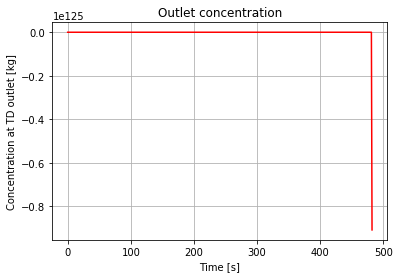

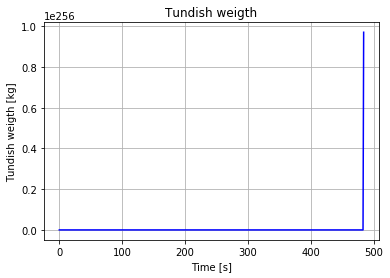

In [132]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.title('Outlet concentration')
plt.plot(t, concentration_out , 'r')
plt.ylabel('Concentration at TD outlet [kg]')
plt.xlabel('Time [s]')
plt.grid()
plt.show()

plt.figure(2)
plt.title('Tundish weigth')
plt.plot(t, tundish_mass , 'b')
plt.ylabel('Tundish weigth [kg]')
plt.xlabel('Time [s]')
plt.grid()
plt.show()